# Семинар: Градиентный спуск. Задачи 

In [23]:
#from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

#%matplotlib inline

## Часть 1. Градиентный спуск

Функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Можно показать, что для линейной модели, функционал ошибки можно записать в матричном виде следующим образом:
$$
Q(w, X, y) =\frac{1}{l} (y - Xw)^T(y-Xw)
$$
или
$$
Q(w, X, y) = \frac{1}{l} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{l} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших функционалов ошибки (= функций потерь = лоссов). Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения функционала ошибки
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [24]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Реализация этого абстрактного класса: Mean Squared Error лосс.

**Задание 1.1:** __Реализуйте класс `MSELoss`__

Он должен вычислять значение функционала ошибки (лосс) $
Q(w, X, y)$ и его градиент $\nabla_w Q(w, X, y)$ по формулам (выше)

In [25]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        l = X.shape[0]
        return np.dot((y - X@w).T, (y - X@w)) / l
  

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        l = X.shape[0]
        return 2 * X.T @ (X @ w - y) / l


Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашего функционала ошибки и градиент:

In [26]:
# Создадим объект лосса
loss = MSELoss()

# Создадим датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим вектор весов
w = np.arange(10)

#print(X)
#print(y)
#print(w)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Для вычисления градиента все готово, реализуем градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2:** __Реализуйте функцию `gradient_descent`__

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором осуществляется шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [27]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> list[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    w = w_init
    result = [w]

    for i in range(n_iterations):
      w = w - lr * loss.calc_grad(X, y, w)
      result.append(w)

    return result



Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории.  
(Если не оговорено иное, то в задачах используются указанные параметры `n_features,
n_objects, batch_size, num_steps`). 


In [28]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [29]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, num_steps)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.5891768045026
0.8670719772817392


In [30]:
w_init

array([0.62074297, 1.79288146])

In [31]:
w_list

[array([0.62074297, 1.79288146]),
 array([ 0.44735749, -1.8304003 ]),
 array([0.26091556, 0.31793598]),
 array([ 0.12674895, -0.95904084]),
 array([-0.00077067, -0.20269022]),
 array([-0.10035868, -0.65294595]),
 array([-0.18955348, -0.38683404]),
 array([-0.26209584, -0.54573687]),
 array([-0.32521258, -0.45223178]),
 array([-0.3775857 , -0.50841489]),
 array([-0.42251159, -0.47564759]),
 array([-0.46016098, -0.49558625]),
 array([-0.49223243, -0.4841667 ]),
 array([-0.51924072, -0.4912955 ]),
 array([-0.54216889, -0.48736123]),
 array([-0.56152377, -0.48994757]),
 array([-0.57792705, -0.48862505]),
 array([-0.59179029, -0.48958987]),
 array([-0.60352966, -0.48916939]),
 array([-0.61345697, -0.48954772]),
 array([-0.62185998, -0.48943211]),
 array([-0.62896794, -0.48959291]),
 array([-0.6349833 , -0.48957547]),
 array([-0.64007231, -0.48965182]),
 array([-0.64437863, -0.48966234]),
 array([-0.64802204, -0.48970334]),
 array([-0.65110494, -0.48971898]),
 array([-0.65371336, -0.48974352

In [32]:
def plot_gd(w_list, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3:** __При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`)__. Используйте не менее четырёх разных значений для `lr`. Для каждой длины шага вычисляйтете значение функционала ошибки при помощи метода `calc_loss` на первой и последней итерациях градиентного спуска.

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

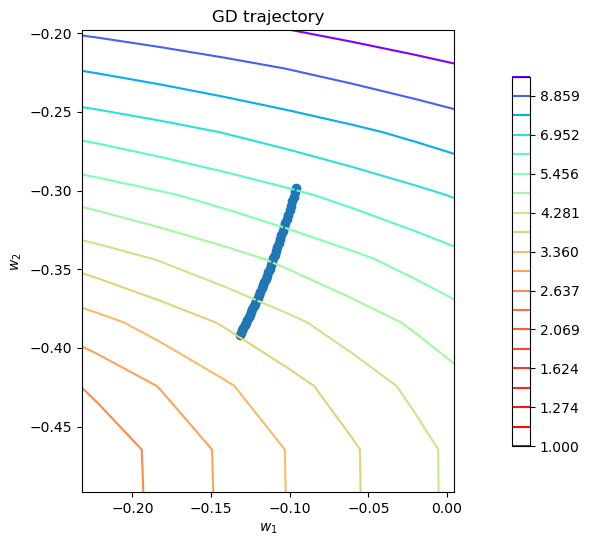

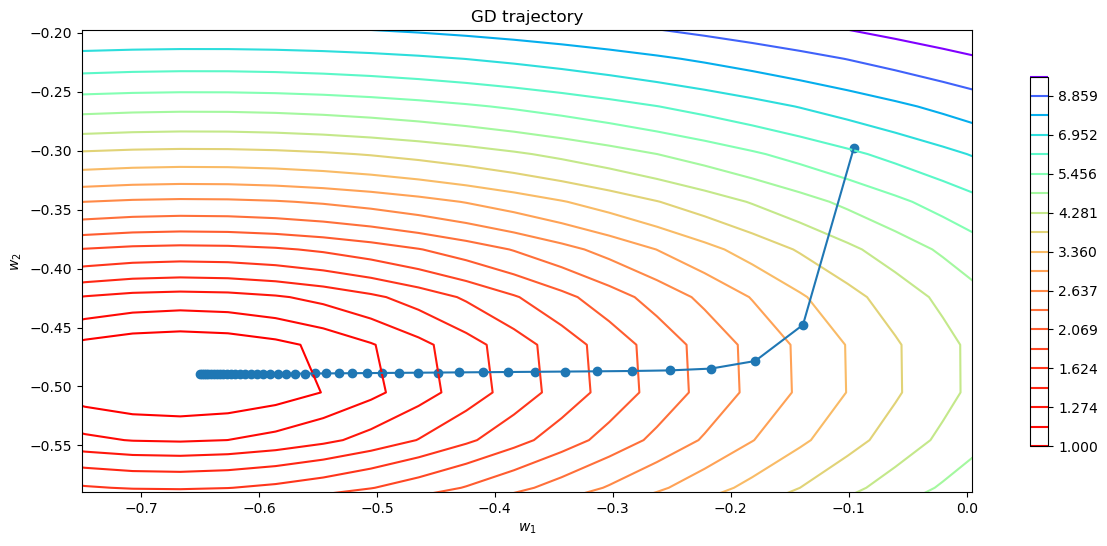

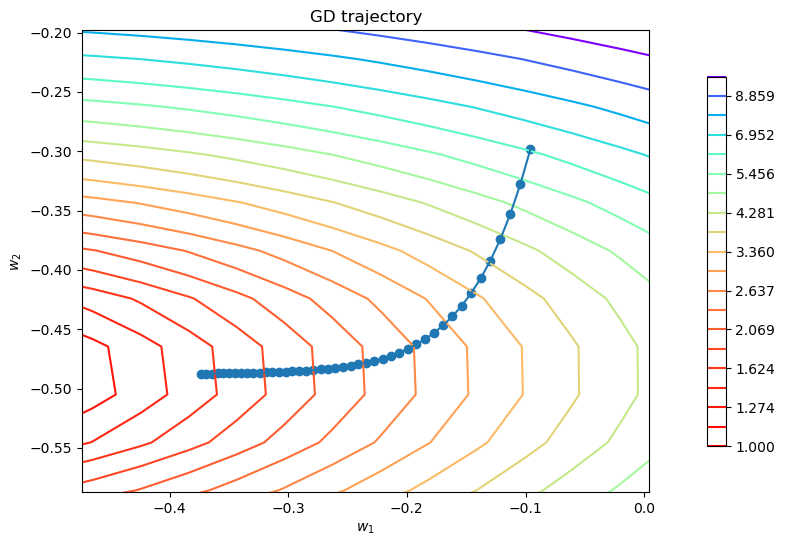

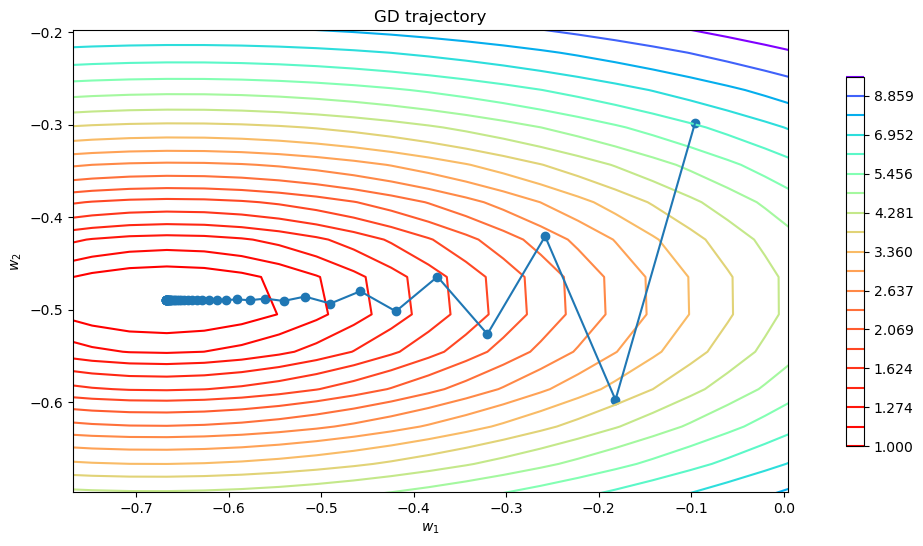

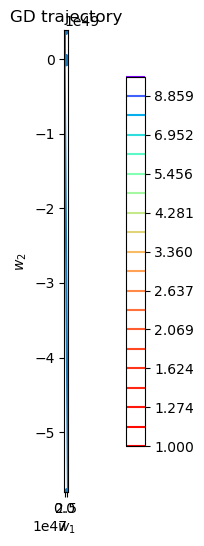

In [33]:
# -- YOUR CODE HERE --
w_init = np.random.uniform(-2, 2, (n_features))
num_steps = 43
loss = MSELoss()

for lr in [0.0001, 0.005, 0.001, 0.01, 0.1]:
    w_list = gradient_descent(w_init, X, y, loss, lr, num_steps)
    plot_gd(w_list, X, y, loss)

Если lr(learning rate) выбран слишком большим, то алгоритм может не сойтись к оптимальному значению, а прыгать вокруг него. Если lr слишком маленький, то алгоритм будет сходиться медленно из-за маленьких шагов.

Теперь реализуем стохастический градиентный спуск

**Задание 1.4:** __Реализуйте функцию `stochastic_gradient_descent`__

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

(*здесь np.random.choice генерирует из np.arange(X.shape[0]), длина size,
replace=False - без повторения*)

In [34]:
X.shape[0]

300

In [35]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> list[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    w = w_init
    result = [w]

    for i in range(n_iterations):
      batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
      batch = X[batch_indices]
      w = w - lr * loss.calc_grad(batch, y[batch_indices], w)
      result.append(w)

    return result
    


**Задание 1.5:** __При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`)__. Используйте не менее трех разных значений для `lr` и `batch_size`. (Для каждых длины шага и размера подвыборки вычисляйтете значение функционала ошибки при помощи метода `calc_loss` на первой и последней итерациях стохастического градиентного спуска).

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

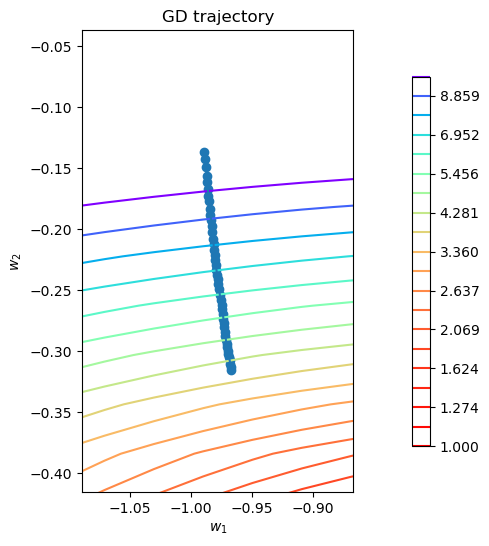

Learning rate: 0.0001 Batch size: 50
Loss on first step: 11.697399861143989
Loss on last step: 4.033566098521468


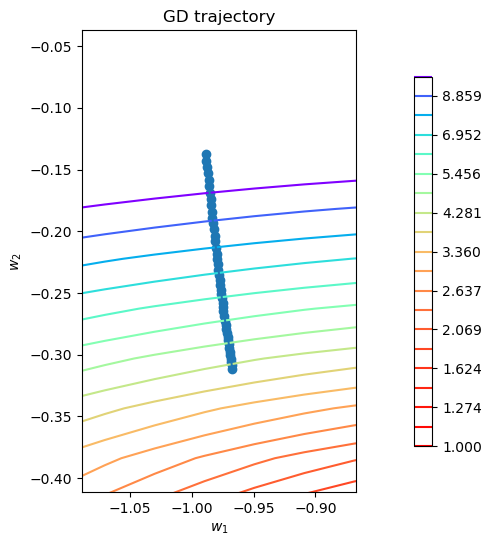

Learning rate: 0.0001 Batch size: 100
Loss on first step: 11.697399861143989
Loss on last step: 4.1493227593691975


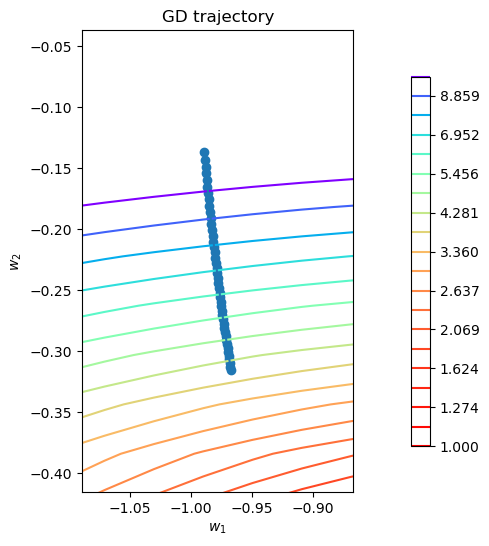

Learning rate: 0.0001 Batch size: 200
Loss on first step: 11.697399861143989
Loss on last step: 4.035528941967362


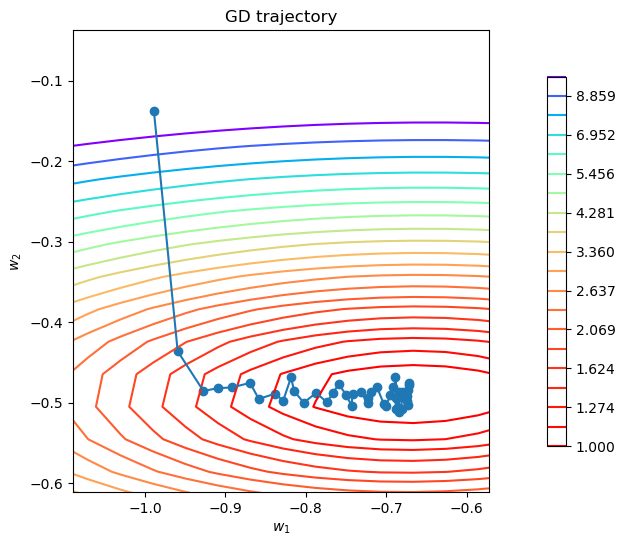

Learning rate: 0.005 Batch size: 50
Loss on first step: 11.697399861143989
Loss on last step: 0.8778566167774344


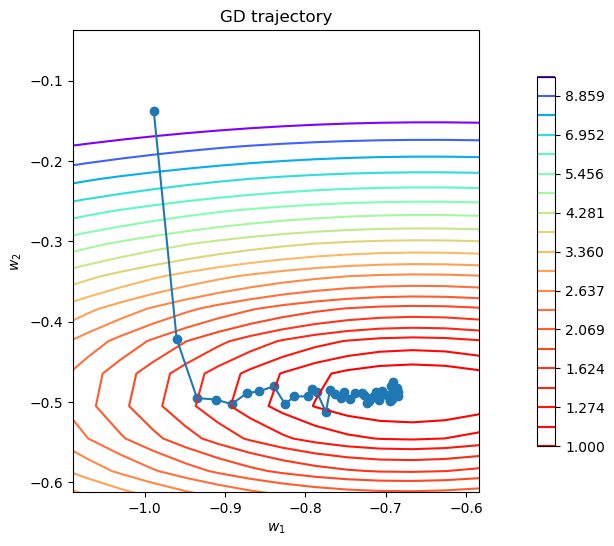

Learning rate: 0.005 Batch size: 100
Loss on first step: 11.697399861143989
Loss on last step: 0.8695471351618737


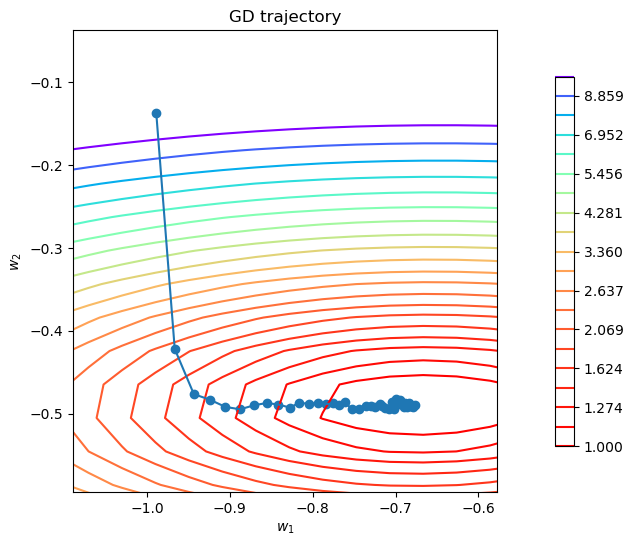

Learning rate: 0.005 Batch size: 200
Loss on first step: 11.697399861143989
Loss on last step: 0.8677504838110323


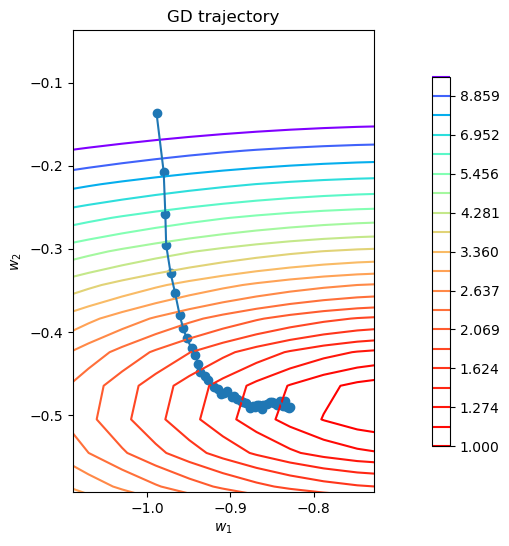

Learning rate: 0.001 Batch size: 50
Loss on first step: 11.697399861143989
Loss on last step: 1.0636744920556662


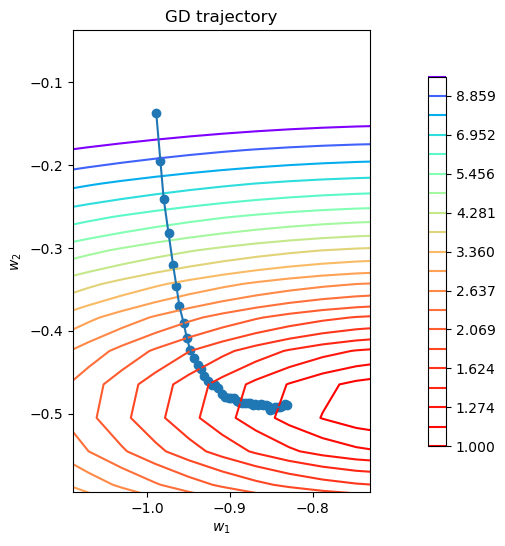

Learning rate: 0.001 Batch size: 100
Loss on first step: 11.697399861143989
Loss on last step: 1.0723173522621998


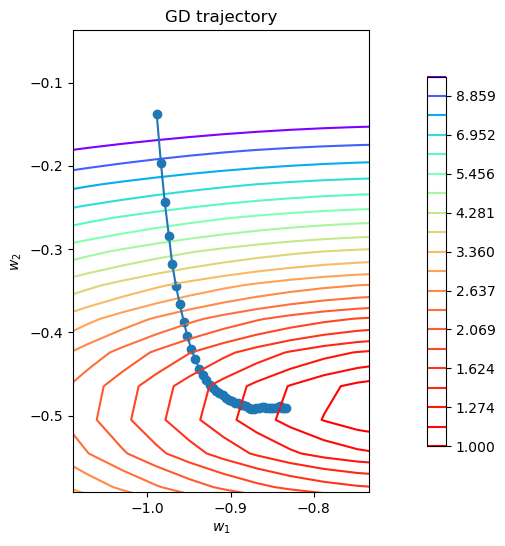

Learning rate: 0.001 Batch size: 200
Loss on first step: 11.697399861143989
Loss on last step: 1.0774586513273021


In [36]:
# -- YOUR CODE HERE --
from itertools import product
w_init = np.random.uniform(-2, 2, (n_features))
num_steps = 43
loss = MSELoss()

for (lr, batch_size) in product([0.0001, 0.005, 0.001], [50, 100, 200]):
    w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, num_steps)
    plot_gd(w_list, X, y, loss)
    print(f"Learning rate: {lr} Batch size: {batch_size}")
    print("Loss on first step:", loss.calc_loss(X, y, w_list[0]))
    print("Loss on last step:", loss.calc_loss(X, y, w_list[-1]))

Отличие поведения стохастического градиентного спуска от обычного заключается в том, что обычный градиентный спуск использует весь набор данных для вычисления градиента на каждой итерации, что в конечном итоге дает более точные обновления весов. Стохастический градиентный спуск, с другой стороны, использует только одно или небольшое количество случайных наблюдений для вычисления градиента на каждой итерации, что делает обновления более чувствительными к изменениям и зачастую приводит к быстрой сходимости, но менее стабильным результатам.

Можно заметить, что поведение градиентного спуска, особенно его стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6:** __Реализуйте функцию `stochastic_gradient_descent` с затухающим шагом по формуле выше__. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [37]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> list[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    w = w_init
    result = [w]

    for i in range(n_iterations):
      batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
      batch = X[batch_indices]
      step_len = lr * (1/(1+lr)) ** p
      w = w - step_len * loss.calc_grad(batch, y[batch_indices], w)
      result.append(w)

    return result
    


**Задание 1.7:** __При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`__. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10. (Для каждого значения параметра `p` вычисляйтете значение функционала ошибки при помощи метода `calc_loss` на первой и последней итерациях стохастического градиентного спуска).

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

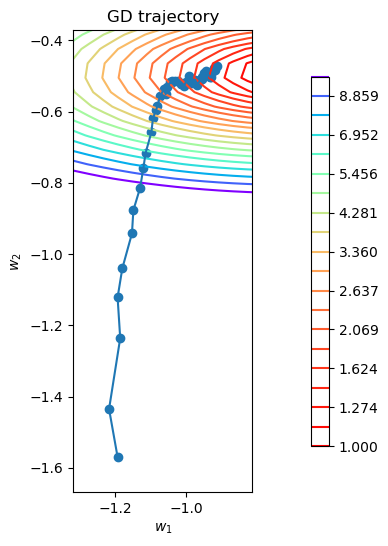

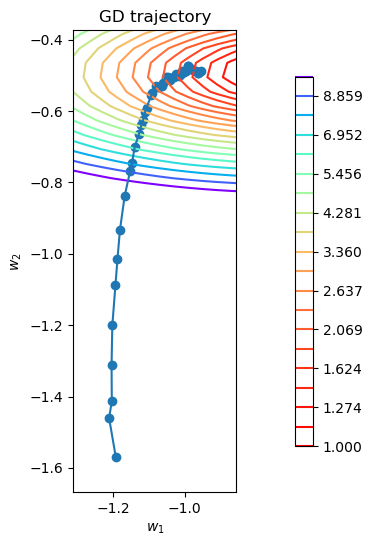

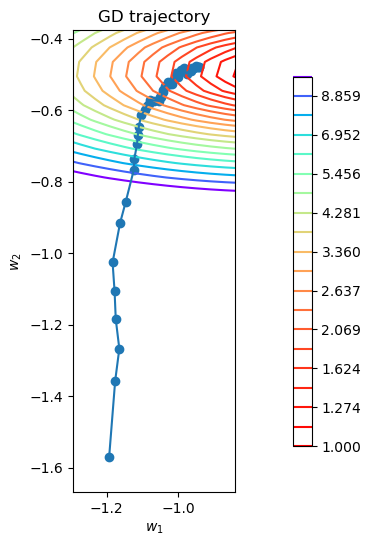

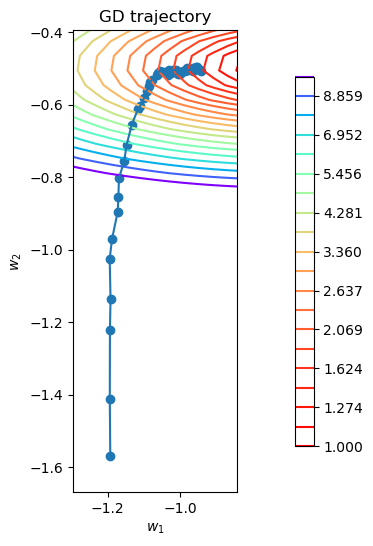

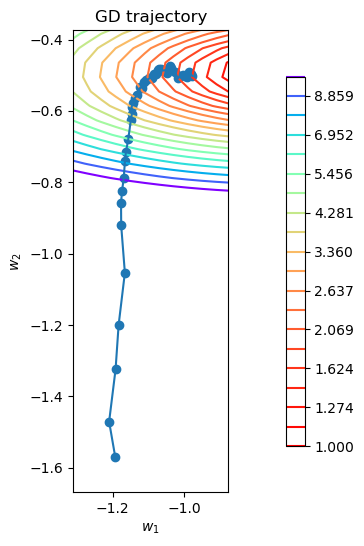

In [38]:
# -- YOUR CODE HERE --
# -- YOUR CODE HERE --
w_init = np.random.uniform(-2, 2, (n_features))
num_steps = 43
loss = MSELoss()
batch_size = 10

for p in [0.1, 0.2, 0.6, 0.8, 1]:
    w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, p, num_steps)
    plot_gd(w_list, X, y, loss)

Параметр p влияет на скорость сходимости стохастического градиентного спуска. Более высокие значения p приводят к более быстрой сходимости, но могут привести к пропуску минимума функции ошибки. С другой стороны, более низкие значения p приводят к более медленной сходимости, но могут обеспечить более точное приближение к минимуму функции ошибки. Это компромисс между скоростью сходимости и точностью.

**Задание 1.8:** __Сравните сходимость обычного градиентного спуска и его стохастической версии__:
Нарисуйте график зависимости значения функционала ошибки (лосса) (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска __с одинаковыми параметрами__. В SGD параметр `batch_size` возьмите равным 10, `p=0`.


In [39]:
print(n_features)
print(n_objects)
print(batch_size)
print(num_steps)

2
300
10
43


<AxesSubplot:xlabel='x', ylabel='y'>

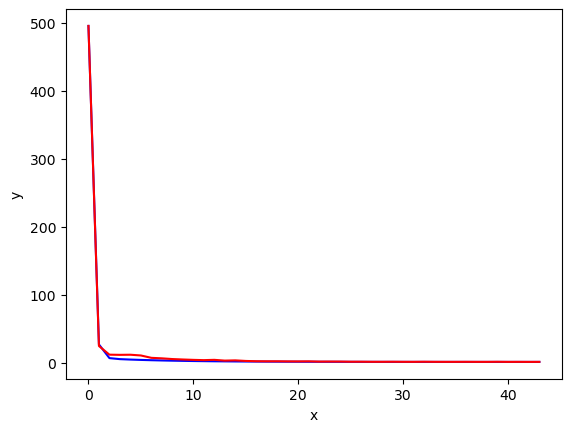

In [40]:
# -- YOUR CODE HERE --
import seaborn as sns
import pandas as pd

w_init = np.random.uniform(-2, 2, (n_features))
num_steps = 43
loss = MSELoss()
lr = 0.005
batch_size = 10
p = 0

common_loss = [loss.calc_loss(X, y, w) for w in gradient_descent(w_init, X, y, loss, lr, num_steps)]
stohastic_loss = [loss.calc_loss(X, y, w) for w in stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, p, num_steps)]
len(stohastic_loss)

sns.lineplot(data= pd.DataFrame({'x': range(44), 'y': common_loss}), x='x', y='y', color = "blue")
sns.lineplot(data= pd.DataFrame({'x': range(44), 'y': stohastic_loss}), x='x', y='y', color ="red")


Как и в нашем случае, чаще всего стохастический градиентный спуск сходится быстрее, но может быть менее стабильным, особенно при больших значениях lr.